# k近邻算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.normal?


In [3]:
raw_data_x = np.random.normal(2.0, 2.5, (2, 10))
raw_data_x

array([[ 0.55515589, -3.11063948,  4.53443705,  3.83533385,  5.67833271,
         3.1570795 ,  3.3155644 ,  1.2266869 ,  1.89876193, -0.17614585],
       [ 3.36792865,  1.75853843,  5.73503508,  4.41407972, -0.45317489,
        -0.16950003,  3.19658647,  1.68330335,  2.48458818, -1.37557986]])

In [4]:
raw_data_x = np.random.normal(5.0, 5.5, (10,2))
raw_data_x

array([[ 3.93272369,  1.13088257],
       [ 1.88618326, 13.9801054 ],
       [ 0.16382862,  3.91060178],
       [-8.27691158, -5.93512496],
       [14.55837489,  0.36312529],
       [-4.1356258 ,  6.06640201],
       [-4.39572355,  3.11917079],
       [ 2.55978755,  9.47129701],
       [ 6.98018193,  4.98257416],
       [ 8.0802628 , 11.5007937 ]])

In [5]:
x = raw_data_x[:,:1].reshape([10,])
x

array([ 3.93272369,  1.88618326,  0.16382862, -8.27691158, 14.55837489,
       -4.1356258 , -4.39572355,  2.55978755,  6.98018193,  8.0802628 ])

In [6]:
x,y = np.hsplit(raw_data_x, 2)
x

array([[ 3.93272369],
       [ 1.88618326],
       [ 0.16382862],
       [-8.27691158],
       [14.55837489],
       [-4.1356258 ],
       [-4.39572355],
       [ 2.55978755],
       [ 6.98018193],
       [ 8.0802628 ]])

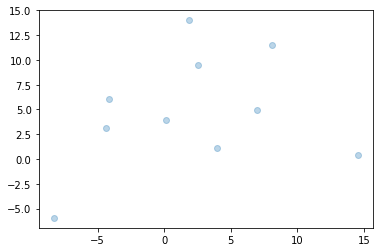

In [7]:
plt.scatter(x, y, alpha=0.3)
plt.show()

In [8]:
raw_data_y = ((x + y >5)+0)[:, 0]
raw_data_y

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [9]:
x_train = raw_data_x
x_train

array([[ 3.93272369,  1.13088257],
       [ 1.88618326, 13.9801054 ],
       [ 0.16382862,  3.91060178],
       [-8.27691158, -5.93512496],
       [14.55837489,  0.36312529],
       [-4.1356258 ,  6.06640201],
       [-4.39572355,  3.11917079],
       [ 2.55978755,  9.47129701],
       [ 6.98018193,  4.98257416],
       [ 8.0802628 , 11.5007937 ]])

In [10]:
y_train = raw_data_y
y_train

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [11]:
x_train[y_train==0, 0]

array([ 0.16382862, -8.27691158, -4.1356258 , -4.39572355])

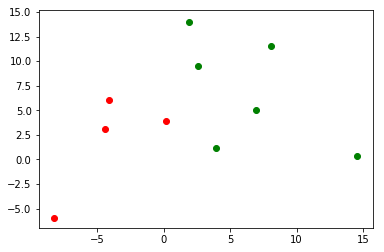

In [12]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='r')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='g')
plt.show()

In [13]:
x = np.array([8,6])

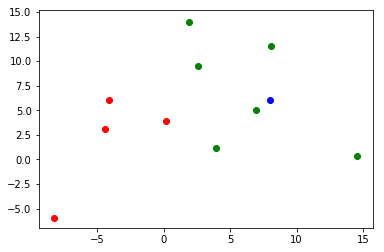

In [14]:
x = np.array([8,6])
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='r')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='g')
plt.scatter(x[0], x[1], c='b')
plt.show()

In [15]:
x_train


array([[ 3.93272369,  1.13088257],
       [ 1.88618326, 13.9801054 ],
       [ 0.16382862,  3.91060178],
       [-8.27691158, -5.93512496],
       [14.55837489,  0.36312529],
       [-4.1356258 ,  6.06640201],
       [-4.39572355,  3.11917079],
       [ 2.55978755,  9.47129701],
       [ 6.98018193,  4.98257416],
       [ 8.0802628 , 11.5007937 ]])

In [16]:
x_train-x


array([[ -4.06727631,  -4.86911743],
       [ -6.11381674,   7.9801054 ],
       [ -7.83617138,  -2.08939822],
       [-16.27691158, -11.93512496],
       [  6.55837489,  -5.63687471],
       [-12.1356258 ,   0.06640201],
       [-12.39572355,  -2.88082921],
       [ -5.44021245,   3.47129701],
       [ -1.01981807,  -1.01742584],
       [  0.0802628 ,   5.5007937 ]])

In [17]:
t = (x_train-x)**2
t

array([[1.65427366e+01, 2.37083045e+01],
       [3.73787552e+01, 6.36820821e+01],
       [6.14055820e+01, 4.36558491e+00],
       [2.64937850e+02, 1.42447208e+02],
       [4.30122812e+01, 3.17743565e+01],
       [1.47273413e+02, 4.40922633e-03],
       [1.53653962e+02, 8.29917692e+00],
       [2.95959115e+01, 1.20499029e+01],
       [1.04002890e+00, 1.03515534e+00],
       [6.44211736e-03, 3.02587313e+01]])

In [18]:
from math import sqrt

In [36]:
np.sum(t, axis=1)

array([ 40.25104108, 101.0608373 ,  65.77116686, 407.38505831,
        74.78663767, 147.27782266, 161.95313919,  41.64581439,
         2.07518423,  30.26517341])

In [19]:
t[:,0]+t[:,1]

array([ 40.25104108, 101.0608373 ,  65.77116686, 407.38505831,
        74.78663767, 147.27782266, 161.95313919,  41.64581439,
         2.07518423,  30.26517341])

In [20]:
np.sum(t, axis=1)

array([ 40.25104108, 101.0608373 ,  65.77116686, 407.38505831,
        74.78663767, 147.27782266, 161.95313919,  41.64581439,
         2.07518423,  30.26517341])

In [21]:
distince = np.sqrt(np.sum(t, axis=1))
distince

array([ 6.34437082, 10.05290193,  8.10994247, 20.18378206,  8.64792678,
       12.13580746, 12.72608106,  6.45335683,  1.44054998,  5.50137923])

In [38]:
np.linalg.norm?

In [39]:
np.linalg.norm(x_train-x, axis=1)

array([ 6.34437082, 10.05290193,  8.10994247, 20.18378206,  8.64792678,
       12.13580746, 12.72608106,  6.45335683,  1.44054998,  5.50137923])

In [22]:
nearest = np.argsort(distince)
nearest

array([8, 9, 0, 7, 2, 4, 1, 5, 6, 3], dtype=int64)

In [23]:
k = 4

In [24]:
k = 5
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 0]

In [25]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({1: 4, 0: 1})

In [26]:
result = votes.most_common(1)[0][0]
result

1

In [27]:
[ ("label:"+i+",res:" + (votes[i]/k)) for i in votes.keys]

TypeError: 'builtin_function_or_method' object is not iterable

In [ ]:
print (str(votes[0]) + "key")

In [ ]:
for key in votes.keys():
#    print("key:" + str(votes[key]))
    print ("key:" + str(key) + ",result:" + str(votes[key]/5))

In [ ]:
np.random.seed(1000)
X = np.random.randint(1, 10, 50)
X

In [ ]:
np.bincount(X)

In [31]:
topK_y

[1, 1, 1, 1, 0]

In [32]:
np.bincount(np.array(topK_y))

array([1, 4], dtype=int64)

In [35]:
np.argmax(np.bincount(np.array(topK_y)))

1

In [49]:
def print_weights(weights, labels = None):

    total = sum(weights)

    if labels is not None:
        assert len(weights) == len(labels), "the size of weights must equal to the size of labels"

        for i, val in enumerate(weights):
            print("[%s]概率:[%s]" % (labels[i], val/total))

    else:
        for i, val in enumerate(weights):
            print("[%s]概率:[%s]" % (i, val/total))
            
weights = np.random.randint(0, 10, 3)
lables = ['白的', '红的', '绿的']
print_weights(weights, lables)


[6 8 9]
[白的]概率:[0.2608695652173913]
[红的]概率:[0.34782608695652173]
[绿的]概率:[0.391304347826087]


In [57]:
np.random.seed(100)
train = np.random.normal(5, 3, 100).reshape(-1, 2)
train

array([[-0.24929642,  6.02804121],
       [ 8.45910741,  4.24269189],
       [ 7.94396236,  6.54265652],
       [ 5.66353901,  1.78987001],
       [ 4.43151251,  5.76500433],
       [ 3.62591904,  6.30549046],
       [ 3.24921485,  7.45054122],
       [ 7.01816242,  4.68676657],
       [ 3.40615887,  8.08919806],
       [ 3.68559313,  1.64504526],
       [ 9.85694498,  9.62481552],
       [ 4.24436258,  2.47269279],
       [ 5.55355607,  7.8112466 ],
       [ 7.19300103,  9.08466838],
       [ 4.02128582,  5.16702804],
       [ 5.66719883,  0.67034901],
       [ 2.73094308,  7.44936203],
       [ 7.25133428,  3.63215922],
       [ 8.5688668 , -0.07185048],
       [ 0.93080285,  1.30269646],
       [ 3.36668251,  2.99548479],
       [ 5.02194369,  3.16118379],
       [ 8.89924422, -0.19928687],
       [ 2.0500697 ,  6.07252326],
       [ 0.15926449,  9.4121416 ],
       [ 1.43594721,  3.35076142],
       [ 2.17986152,  2.51620291],
       [ 5.3265904 ,  6.52342877],
       [ 2.41331796,

In [60]:
dest = (np.sum(train, axis=1) > 8) + 0
dest

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0])

In [61]:
labels = ["绿色", "红色"]

In [69]:
from mymlcode.lib import kNN_func as kfunc

In [84]:
k = 6
v1 = np.array([2,4])
res = kfunc.kNN_func(k, train, dest, v1, labels)

[绿色]概率:[0.8333333333333334]
[红色]概率:[0.16666666666666666]


In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [88]:
kNN_classifier.fit(train, dest)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [94]:
v2 = np.array([[2,9]])
kNN_classifier.predict(v2)[0]

1